<a href="https://colab.research.google.com/github/alextepper/123/blob/master/miniProjectBoston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [48]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

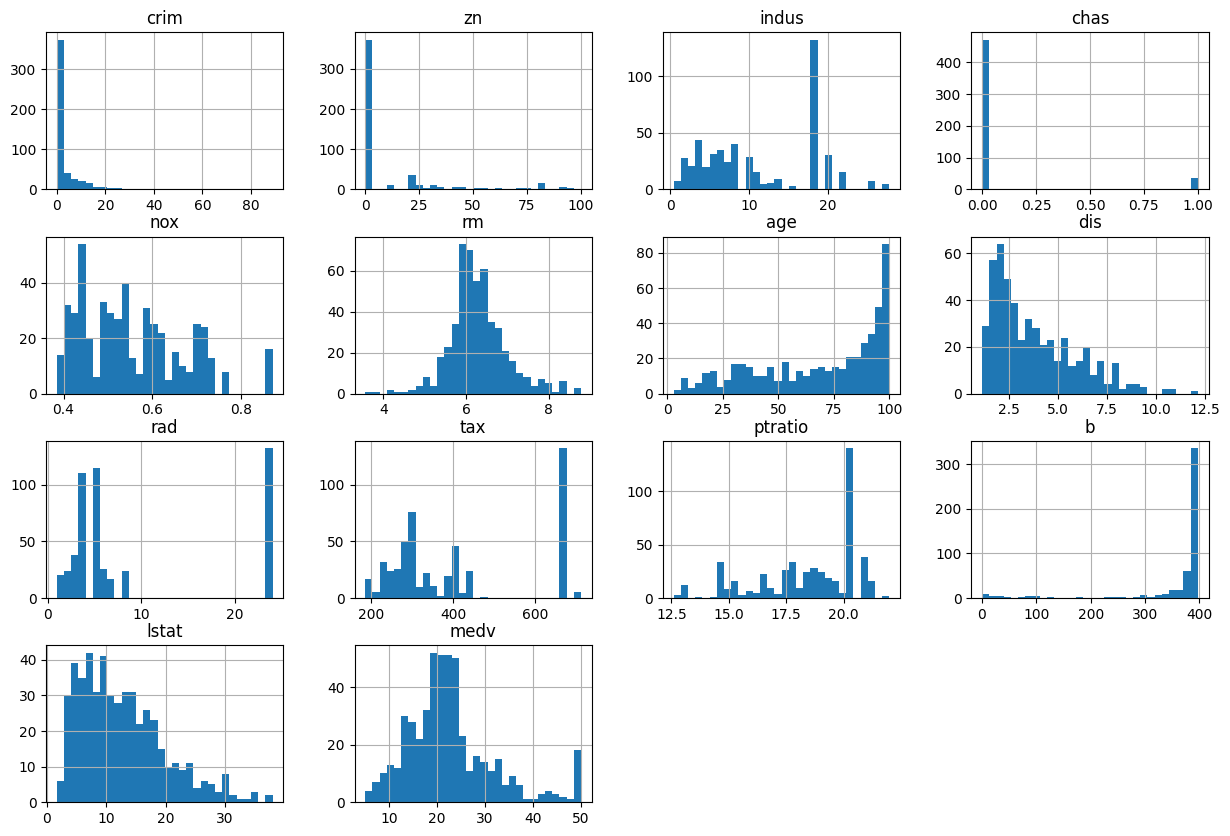

In [13]:
df.hist(bins=30, figsize=(15,10))

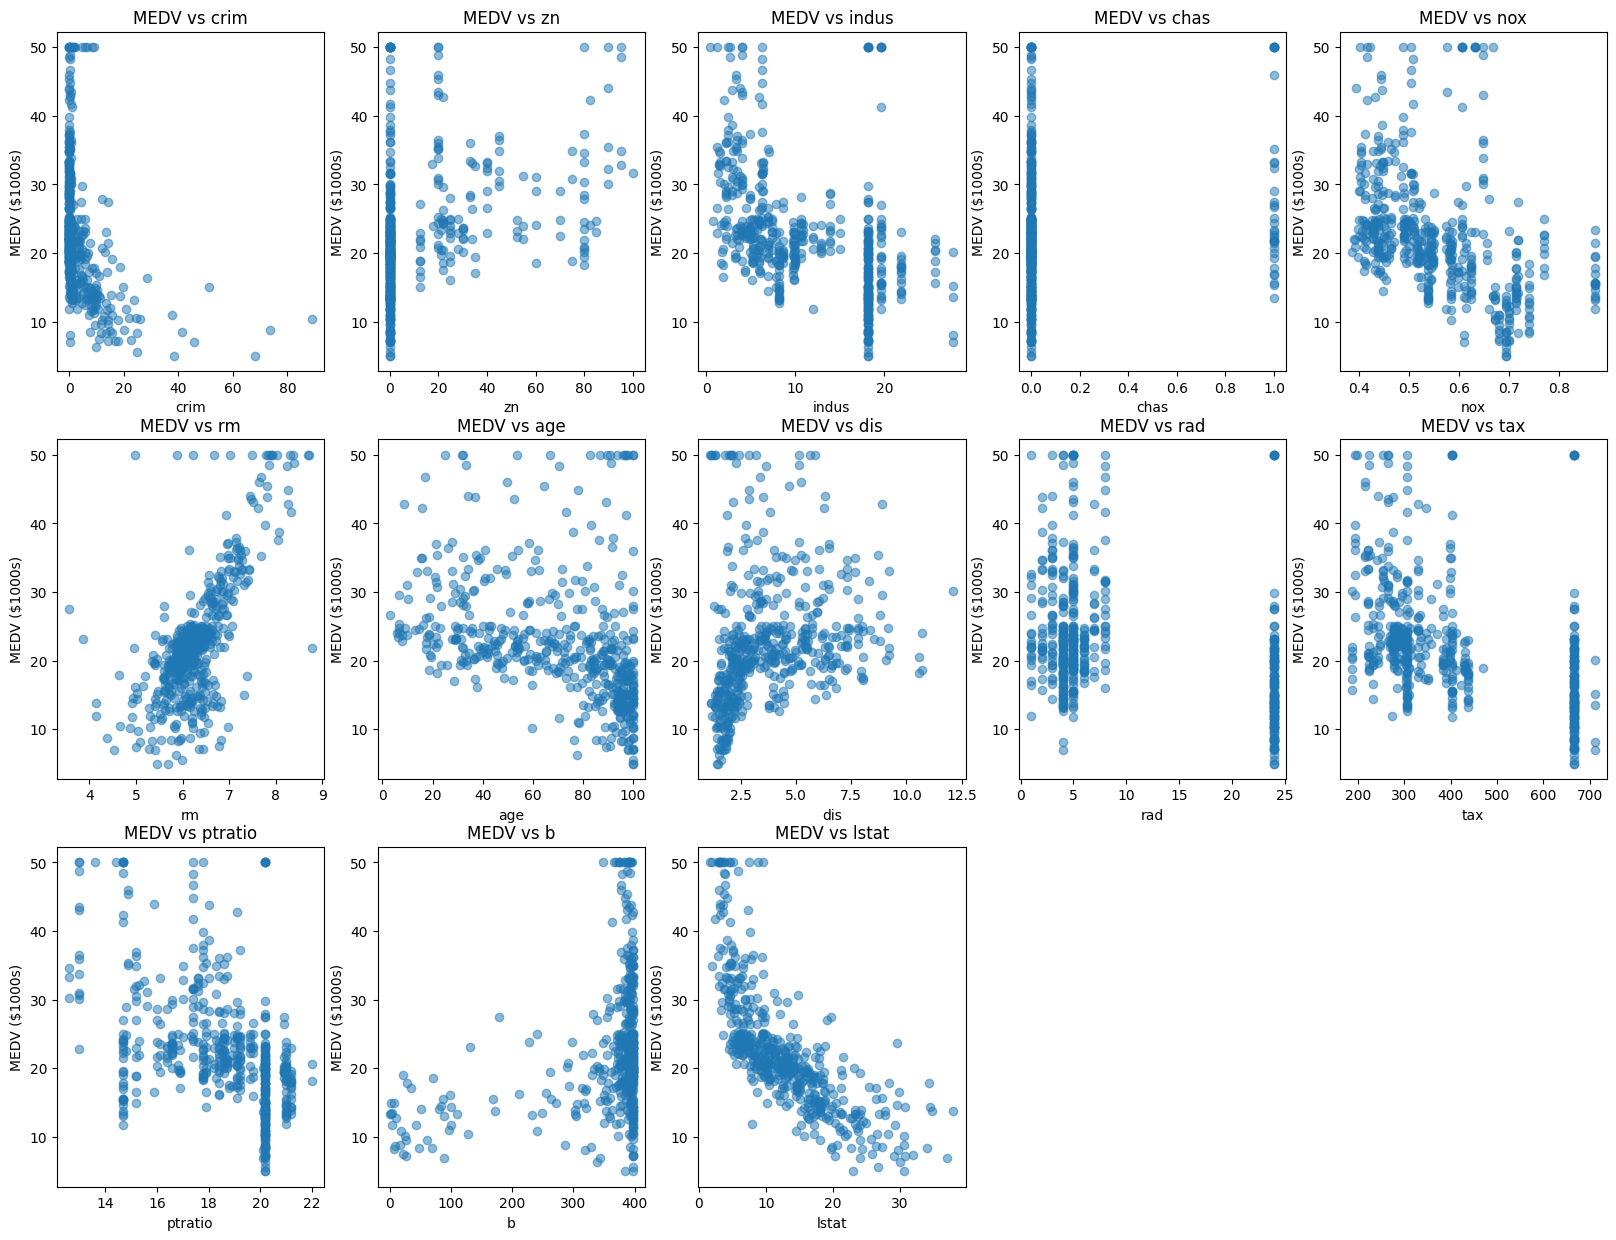

In [14]:
variables = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

plt.figure(figsize=(20,15))

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 5, i)
    plt.scatter(df[variable], df['medv'], alpha=0.5)
    plt.xlabel(variable)
    plt.ylabel('MEDV ($1000s)')
    plt.title(f"MEDV vs {variable}")

In [16]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)

In [23]:
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat', 'medv']

scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.386831,0.580954,0.681771,0.122671,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.386831,0.490324,0.760041,0.105293,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.386831,0.654340,0.907312,0.094381,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.386831,0.619467,0.889804,0.114514,0.164122,0.893617,0.991301,0.131071,0.377778


In [34]:
df['age_category'] = pd.cut(df['age'],
                            bins=[0, 35, 70, 100],
                            labels=['new', 'old', 'very old'],
                            right=False)

age_dummies = pd.get_dummies(df['age_category'], prefix='age')
df = pd.concat([df, age_dummies], axis=1)
# Drop the original 'age_category' column
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,age_new,age_old,age_very old
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,1,0.208015,0.287234,1.000000,0.089680,0.422222,new,1,0,0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,2,0.104962,0.553191,1.000000,0.204470,0.368889,new,1,0,0
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,2,0.104962,0.553191,0.989737,0.063466,0.660000,new,1,0,0
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,3,0.066794,0.648936,0.994276,0.033389,0.631111,new,1,0,0
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,3,0.066794,0.648936,1.000000,0.099338,0.693333,new,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,1,0.164122,0.893617,0.987619,0.219095,0.386667,new,1,0,0
502,0.000438,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,1,0.164122,0.893617,1.000000,0.202815,0.346667,new,1,0,0
503,0.000612,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,1,0.164122,0.893617,1.000000,0.107892,0.420000,new,1,0,0
504,0.001161,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,1,0.164122,0.893617,0.991301,0.131071,0.377778,new,1,0,0


In [37]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-37-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_new,age_old,age_very old
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,NaN,NaN,NaN
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,NaN,NaN,NaN
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,NaN,NaN,NaN
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,NaN,NaN,NaN
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,NaN,NaN,NaN
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,NaN,NaN,NaN
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,NaN,NaN,NaN
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,NaN,NaN,NaN
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,NaN,NaN,NaN
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

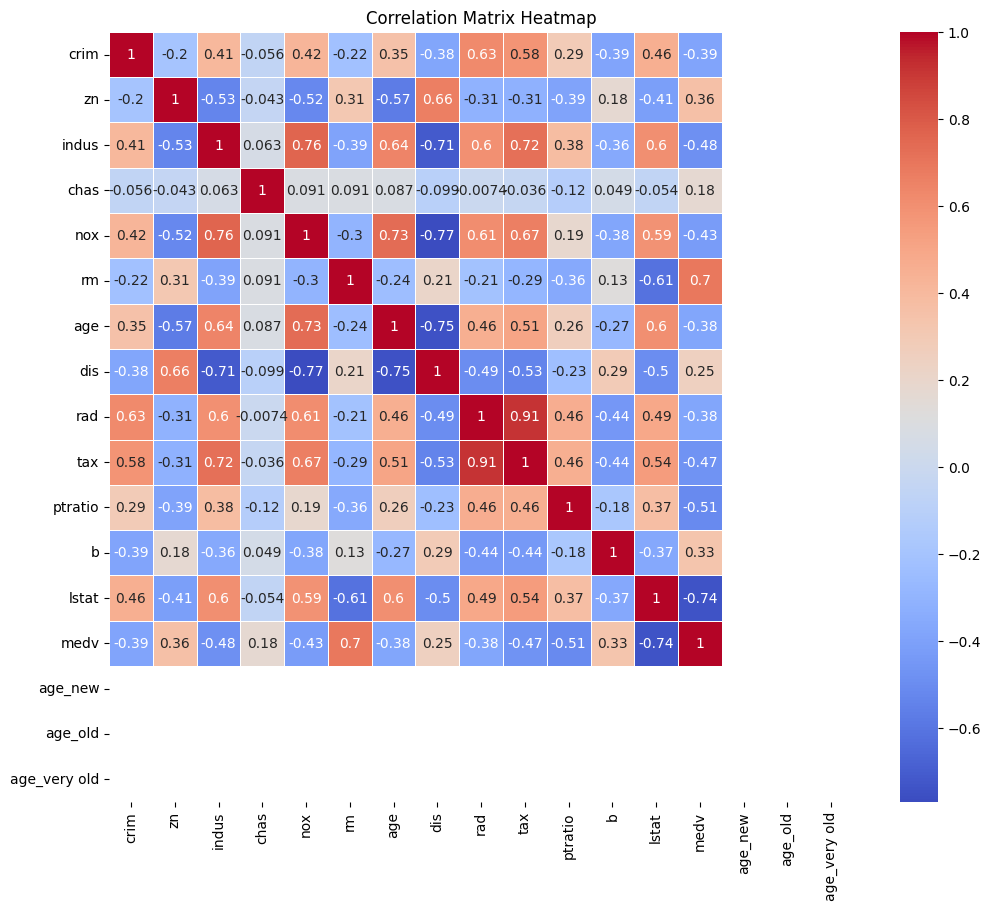

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")

In [45]:
df['rm_lstat'] = df['rm'] * df['lstat']
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,age_category,age_new,age_old,age_very old,RM_LSTAT,rm_lstat
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,1,0.208015,0.287234,1.000000,0.089680,0.422222,new,1,0,0,0.051791,0.051791
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,2,0.104962,0.553191,1.000000,0.204470,0.368889,new,1,0,0,0.112049,0.112049
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,2,0.104962,0.553191,0.989737,0.063466,0.660000,new,1,0,0,0.044070,0.044070
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,3,0.066794,0.648936,0.994276,0.033389,0.631111,new,1,0,0,0.021988,0.021988
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,3,0.066794,0.648936,1.000000,0.099338,0.693333,new,1,0,0,0.068255,0.068255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0,0.386831,0.580954,0.681771,0.122671,1,0.164122,0.893617,0.987619,0.219095,0.386667,new,1,0,0,0.127284,0.127284
502,0.000438,0.00,0.420455,0,0.386831,0.490324,0.760041,0.105293,1,0.164122,0.893617,1.000000,0.202815,0.346667,new,1,0,0,0.099445,0.099445
503,0.000612,0.00,0.420455,0,0.386831,0.654340,0.907312,0.094381,1,0.164122,0.893617,1.000000,0.107892,0.420000,new,1,0,0,0.070598,0.070598
504,0.001161,0.00,0.420455,0,0.386831,0.619467,0.889804,0.114514,1,0.164122,0.893617,0.991301,0.131071,0.377778,new,1,0,0,0.081194,0.081194


In [49]:
new_properties = df[df['age'] <= 35]
old_properties = df[(df['age'] > 35) & (df['age'] <= 70)]
very_old_properties = df[df['age'] > 70]
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


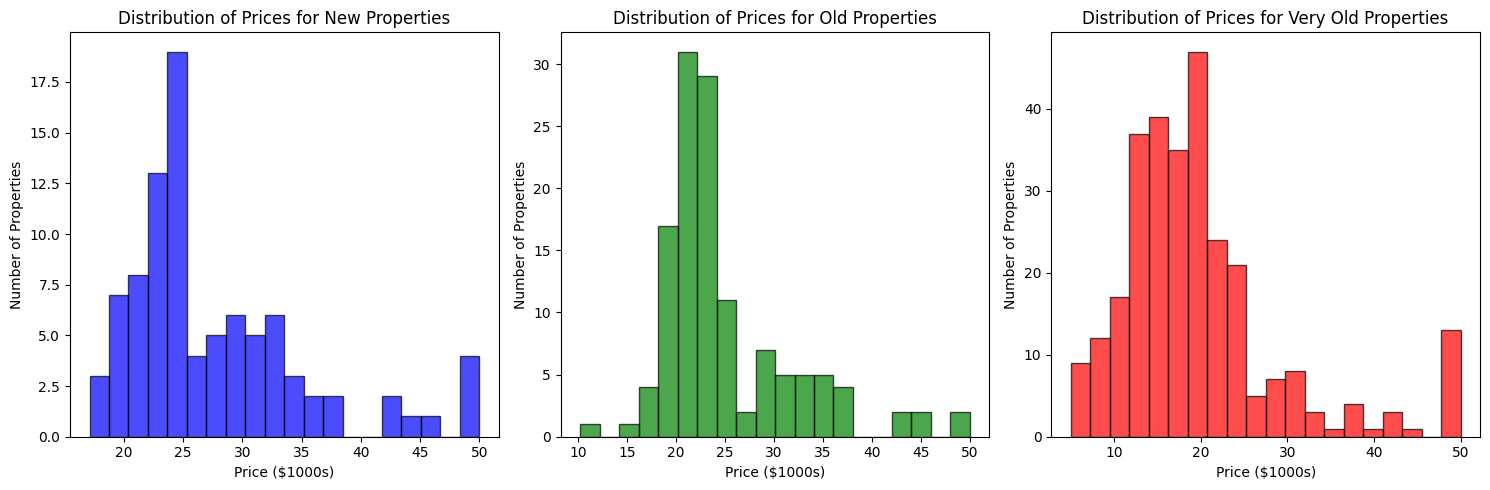

In [50]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(new_properties['medv'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for New Properties')
plt.xlabel('Price ($1000s)')
plt.ylabel('Number of Properties')

plt.subplot(1, 3, 2)
plt.hist(old_properties['medv'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Old Properties')
plt.xlabel('Price ($1000s)')
plt.ylabel('Number of Properties')

plt.subplot(1, 3, 3)
plt.hist(very_old_properties['medv'], bins=20, color='red', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices for Very Old Properties')
plt.xlabel('Price ($1000s)')
plt.ylabel('Number of Properties')

plt.tight_layout()
plt.show()


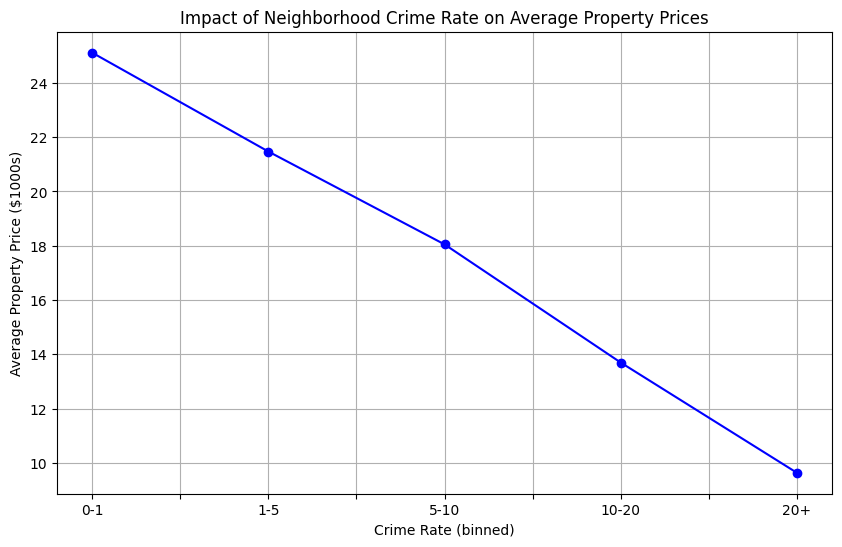

In [51]:
df['CRIM_BIN'] = pd.cut(df['crim'], bins=[0, 1, 5, 10, 20, max(df['crim'])], labels=['0-1', '1-5', '5-10', '10-20', '20+'])

avg_MEDV_per_CRIM_BIN = df.groupby('CRIM_BIN')['medv'].mean()

plt.figure(figsize=(10, 6))
avg_MEDV_per_CRIM_BIN.plot(kind='line', marker='o', color='blue')

plt.title('Impact of Neighborhood Crime Rate on Average Property Prices')
plt.xlabel('Crime Rate (binned)')
plt.ylabel('Average Property Price ($1000s)')
plt.grid(True)
plt.show()